In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
#Data Preparation / Cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [25]:
df.duplicated().sum()

1

In [26]:
df.drop_duplicates(inplace=True)

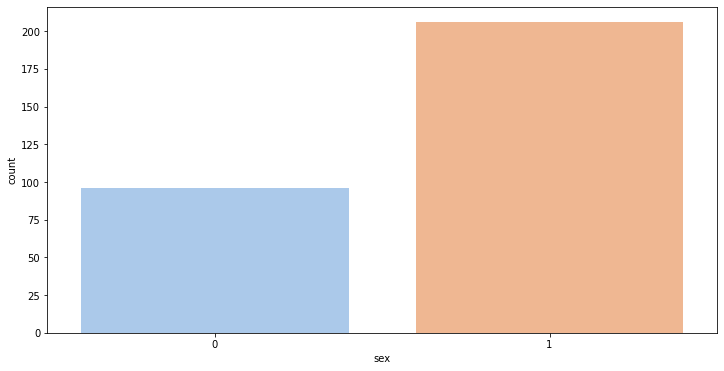

In [37]:
#EDA

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

plt.figure(figsize=(12,6))
ax = plt.axes()
p = sns.countplot(data = df, x="sex", palette='pastel')

<AxesSubplot:xlabel='cp', ylabel='count'>

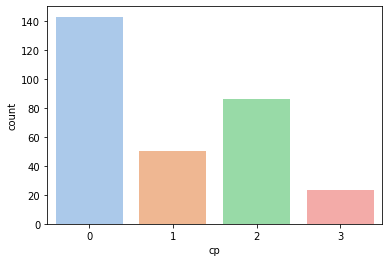

In [38]:
ax = plt.axis()
sns.countplot(x = 'cp', data = df, palette = 'pastel')

In [ ]:
# Observation:
# cp : Chest Pain type chest pain type
# Value 0: typical angina
# Value 1: atypical angina
# Value 2: non-anginal pain
# Value 3: asymptomatic
# People of chest pain category '0' have the highest count,
# whereas the count of chest pain '3' is the lowest

# Your code for further analysis or visualization here

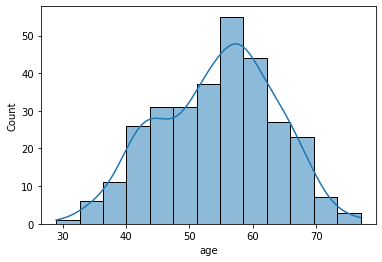

In [35]:
sns.histplot(df['age'], kde=True)
plt.show()

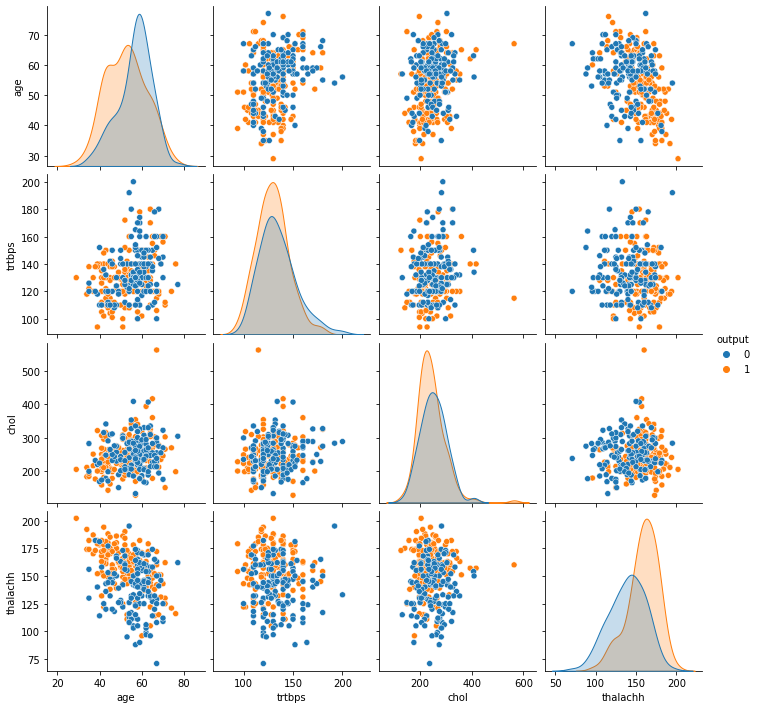

In [36]:
sns.pairplot(df[['age', 'trtbps', 'chol', 'thalachh', 'output']], hue='output')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


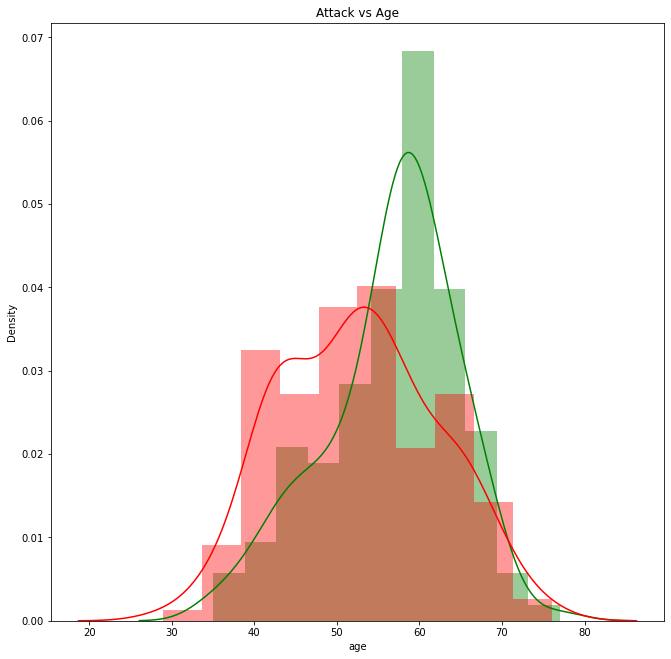

In [33]:
#Compare two different variables and provide short analysis (ex: gender and sex, gender and cp, cp and chol, etc.)

plt.figure(figsize = (11, 11))
sns.distplot(df[df['output'] == 0]["age"], color = 'green', kde = True)
sns.distplot(df[df['output'] == 1]["age"], color = 'red', kde = True)
plt.title('Attack vs Age')
plt.show()

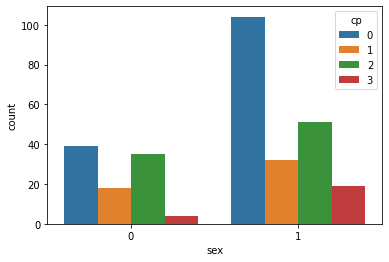

In [41]:
sns.countplot(x = 'sex', hue = 'cp', data = df)
plt.show()

In [ ]:
#Male (1) memiliki representasi yang jauh lebih tinggi dibandingkan Female (0). Namun di kedua gender, urutan chest pain type dari terbesar sampai terkecil sama yaitu typical angina, non-angina pain, atypical angina, dan asymptomatic

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

X = df.drop('output', axis=1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'K-Nearest Neighbor': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

K-Nearest Neighbor Accuracy: 0.92
Logistic Regression Accuracy: 0.84
Gaussian Naive Bayes Accuracy: 0.89
Bernoulli Naive Bayes Accuracy: 0.87
Support Vector Machine Accuracy: 0.87
Random Forest Accuracy: 0.89


In [51]:
# Kesimpulan:

# Dari hasil evaluasi model pada dataset prediksi penyakit jantung, K-Nearest Neighbors (KNN) berhasil mencapai akurasi tertinggi sebesar 92%. 
# KNN dikenal karena sederhananya dan efektivitasnya dalam menangkap pola lokal dalam data. 
# Regresi Logistik juga memberikan kinerja yang baik dengan akurasi 84%, menunjukkan kemampuannya dalam memodelkan hubungan linear. 
# Gaussian Naive Bayes menunjukkan akurasi yang solid sebesar 89%, memanfaatkan asumsi probabilitas untuk membuat prediksi.

# Bernoulli Naive Bayes, yang dirancang untuk fitur biner, dan Mesin Vektor Pendukung (SVM) keduanya menunjukkan akurasi sebesar 87%, 
# menandakan kinerja yang dapat diandalkan dalam tugas ini. Random Forest, sebuah metode ensemble yang menggabungkan beberapa pohon keputusan, 
# mencapai akurasi sebesar 89%, menunjukkan kapasitasnya dalam menangani hubungan yang kompleks dalam data.

# Secara keseluruhan, model-model tersebut menunjukkan tingkat akurasi yang bervariasi, dengan K-Nearest Neighbors menjadi model terbaik dalam evaluasi ini. 
# Pemilihan model yang paling sesuai dapat bergantung pada faktor-faktor seperti interpretabilitas, efisiensi komputasional, dan persyaratan khusus dari aplikasi tersebut. 
# Penyesuaian lebih lanjut dan eksplorasi hyperparameter dapat meningkatkan kinerja model-model ini.